In [108]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects   as go

total_cases = pd.read_csv('./total_cases.csv')
total_cases_br = pd.read_csv('./cases-brazil-total.csv')
world_cases = pd.read_csv('./biweekly_cases.csv')
world_death = pd.read_csv('./biweekly_deaths.csv')
vacinations = pd.read_csv('./vaccinations-by-age-group.csv')

brazil_states_cases = pd.read_csv('./cases-brazil-states.csv')

world_cases


,date,World,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
0,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,2024-07-31,108095.0,0.0,276.0,0.0,38.0,0.0,0.0,0.0,0.0,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,1.0
1670,2024-08-01,108095.0,0.0,276.0,0.0,38.0,0.0,0.0,0.0,0.0,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,1.0
1671,2024-08-02,108095.0,0.0,276.0,0.0,38.0,0.0,0.0,0.0,0.0,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,1.0
1672,2024-08-03,108095.0,0.0,276.0,0.0,38.0,0.0,0.0,0.0,0.0,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,1.0


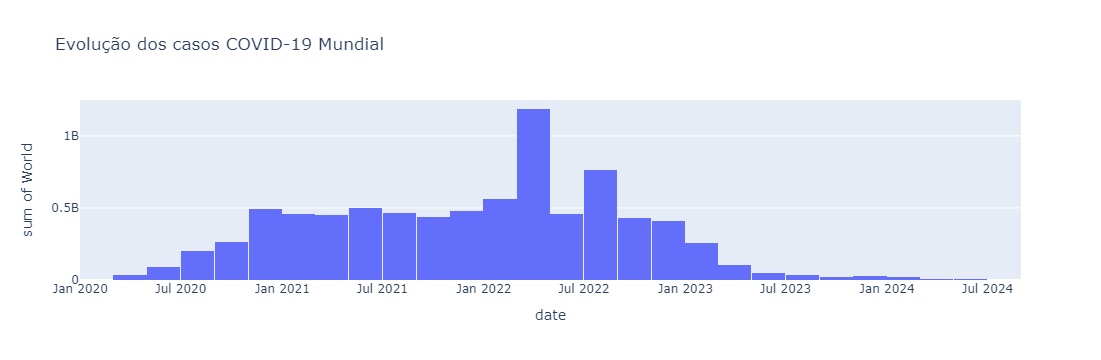

In [109]:
mean_cases = world_cases['World'].mean()
std_cases = world_cases['World'].std()

# remover os que estao com dados muito descrepantes
limite_superior = mean_cases + 3 * std_cases
limite_inferior = mean_cases - 3 * std_cases

world_cases_sem_anomalias = world_cases[(world_cases['World'] <= limite_superior) & (world_cases['World'] >= limite_inferior)]

px.histogram(
    world_cases_sem_anomalias,
    x="date",
    y="World",
    title="Evolução dos casos COVID-19 Mundial"
)

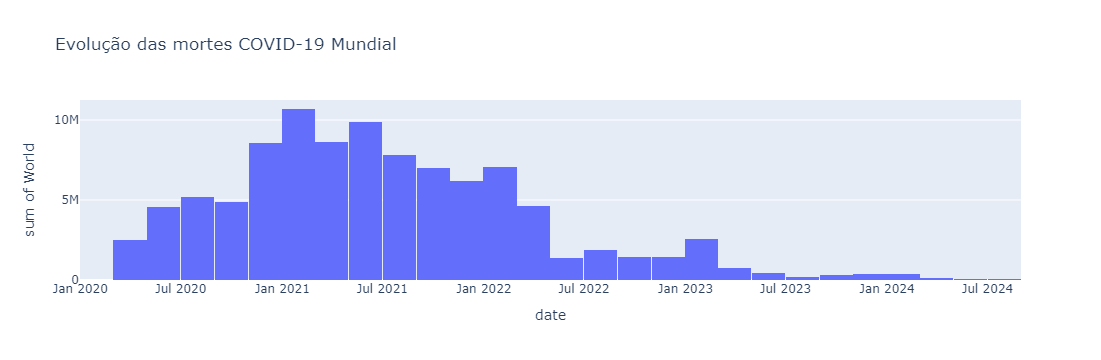

In [110]:
mean_death = world_death['World'].mean()
std_death = world_death['World'].std()

# remover os que estao com dados muito descrepantes
limite_superior = mean_death + 3 * std_death
limite_inferior = mean_death - 3 * std_death

world_deaths_sem_anomalias = world_death[(world_death['World'] <= limite_superior) & (world_death['World'] >= limite_inferior)]

px.histogram(
    world_deaths_sem_anomalias,
    x="date",
    y="World",
    title="Evolução das mortes COVID-19 Mundial"
)

### Como foi a evolução mundial da covid 19?
O ano de 2019 foi quando se descobriu o vírus mas foi no inicio de 2020 que começou os casos, e 2021 que teve picos e onde as pessoas mais se desesperaram (pois era algo novo e teve mais mortes). Durante esse período, várias ondas da pandemia atingiram diferentes regiões.

Já em termos de novas infecções, o início de 2022 também foi marcante devido à variante Ômicron, que se espalhou rapidamente, mas com impacto menos severo em hospitalizações e mortes em comparação com variantes anteriores, devido a campanhas de vacinação em massa e imunidade adquirida.

68% dos dados estão dentro de 1 desvio padrão da média 
95% dos dados estão dentro de 2 desvios padrão da média 
99,7% dos dados estão dentro de 3 desvios padrão da média 

ou seja o 3 que eu coloquei ali é que ele aceita 3 desvios da media. Estudei sobre a regra empirica para isso

In [111]:
vacinations.groupby('location').sum().sort_values(by="people_fully_vaccinated_per_hundred",ascending=False).head(5)

,date,age_group,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,people_with_booster_per_hundred
location,,,,,
Argentina,2020-01-012020-01-012020-01-012020-01-012020-0...,100+12-1718-293-1130-3940-4950-5960-6970-7980-...,1004945.97,792395.26,668708.24
Hong Kong,2021-02-222021-02-222021-02-222021-02-222021-0...,30-3940-4950-5960-6970-790-1920-2930-3940-4950...,702664.22,668834.86,467052.46
Australia,2021-05-102021-05-102021-05-102021-05-102021-0...,16-1920-2930-3940-4950-5960-6970-7980-8990+40-...,356041.25,307407.13,0.00
Israel,2021-01-142021-01-142021-01-142021-01-142021-0...,20-2930-3940-4950-5960-6970-7980-8990+20-2930-...,337392.90,306709.50,130614.80
Japan,2021-02-172021-02-182021-02-192021-02-222021-0...,12-6412-6412-6412-6412-6412-6412-6412-6412-641...,128140.30,122040.17,66897.02


In [112]:
df_vacinacao_inicial = vacinations[vacinations['people_vaccinated_per_hundred'] > 0]

primeira_vacinacao_por_pais = df_vacinacao_inicial.groupby('location')['date'].min().reset_index()

primeira_vacinacao_por_pais = primeira_vacinacao_por_pais.sort_values(by='date')

primeira_vacinacao_por_pais.head(5)

,location,date
5,Canada,2020-12-19
36,Switzerland,2020-12-27
0,Argentina,2020-12-29
35,Sweden,2021-01-01
33,Slovenia,2021-01-01


### Quais são os 5 países mais avançados em relação à vacinação da 
população
Os países mais evoluidos na vacinação são: Argentina, Hong Kong, Australia, Israel e Japan
E os que começaram a Vacinar primeiro são: Canada, Argentina, Switzerland, Sweden e Slovenia 

Podemos ver que a maior é paises mais desenvolvidos e ricos que começaram a vacinar a população.?

In [113]:
world_cases.drop(columns=["date", 'World']).max().sort_values(ascending=False).head(20)

Asia                             68231011.0
Upper-middle-income countries    66037581.0
China                            65120353.0
High-income countries            31851003.0
Europe                           21133019.0
European Union (27)              17108643.0
North America                    12494973.0
United States                    10693821.0
Lower-middle-income countries     6174488.0
India                             5336242.0
South Korea                       5136662.0
South America                     5028111.0
France                            4746417.0
Vietnam                           3523348.0
Germany                           3171395.0
Japan                             2892269.0
United Kingdom                    2612403.0
Russia                            2560301.0
Brazil                            2524049.0
Italy                             2499894.0
dtype: float64

In [114]:
world_death.drop(columns=["date", 'World']).max().sort_values(ascending=False).head(20)

High-income countries            119594.0
Upper-middle-income countries     88668.0
Europe                            79613.0
Asia                              78398.0
Lower-middle-income countries     74102.0
North America                     68452.0
South America                     65947.0
India                             56904.0
European Union (27)               55345.0
China                             49047.0
United States                     45807.0
Brazil                            41606.0
Indonesia                         23817.0
Mexico                            19372.0
United Kingdom                    18517.0
Russia                            17369.0
Africa                            13579.0
Chile                             12513.0
Germany                           12222.0
Japan                             12199.0
dtype: float64

### Quais são os 5 países com mais casos e mortes acumulados?
Mais casos são: China,United States, India, South Korea, France
Mais mortes: India,China ,United States, Brazil, Indonesia

E com relação aos 2 com morte e casos juntos: India, china, United States,Germany, Japao

E podemos ver que os que tem mais morte e com "menos" casos são paiuses menos desenvolvidos.

In [115]:
brazil_states_cases[['state','newDeaths','deaths', 'totalCases', 'newCases']].groupby('state').sum().sort_values(by="deaths", ascending=False)

,newDeaths,deaths,totalCases,newCases
state,,,,
TOTAL,699310,494376964,21517440517,37085520
SP,179039,124107818,3965188367,6469442
RJ,76852,55572424,1435593073,2754359
MG,65507,43598253,2249651798,4189760
PR,46022,30606185,1603229319,2920177
RS,41921,28491527,1569793604,2962414
BA,31459,22254267,1144592781,1792572
CE,28157,21024413,904729913,1453417
GO,28041,19122318,957367924,1900459


In [116]:
brazil_states_cases[['state','newDeaths','deaths', 'totalCases', 'newCases']].groupby('state').sum().sort_values(by="totalCases", ascending=False)


,newDeaths,deaths,totalCases,newCases
state,,,,
TOTAL,699310,494376964,21517440517,37085520
SP,179039,124107818,3965188367,6469442
MG,65507,43598253,2249651798,4189760
PR,46022,30606185,1603229319,2920177
RS,41921,28491527,1569793604,2962414
RJ,76852,55572424,1435593073,2754359
SC,22703,15685030,1190002435,1986447
BA,31459,22254267,1144592781,1792572
GO,28041,19122318,957367924,1900459


### Quais são os 5 estados brasileiros com mais casos e mortes acumulados?
Mais casos são: SP ,MG, PR, RS, RJ
Mais mortes: SP,RJ ,MG, PR, RS

E com relação aos 2 com morte e casos juntos: os mesmos

E podemos ver que os que tem mais morte e com "menos" casos são estados com problemas de desenvolvimento/mais pobres.

In [117]:
brazil_states_cases

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30837,311,2023-03-18,Brazil,SC,TOTAL,0,22703,0,1986447,22703,...,2568392.0,35847.42493,6308275.0,88.04552,5862014.0,81.81699,277356.0,3.87110,4166331.0,58.15009
30838,311,2023-03-18,Brazil,SE,TOTAL,0,6502,0,359692,6502,...,604183.0,26283.72782,2023048.0,88.00851,1860868.0,80.95320,43065.0,1.87345,1376006.0,59.86029
30839,311,2023-03-18,Brazil,SP,TOTAL,0,179039,0,6469442,179039,...,19501783.0,42469.91918,43381275.0,94.47337,40857206.0,88.97659,1286285.0,2.80120,29057424.0,63.27967
30840,311,2023-03-18,Brazil,TO,TOTAL,0,4232,0,365538,4232,...,903975.0,57473.10960,1183632.0,75.25320,1029319.0,65.44226,56219.0,3.57430,595805.0,37.88021


In [118]:
total_cases_br

,country,state,totalCases,totalCasesMS,notConfirmedByMS,deaths,deathsMS,URL,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,...,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants,date,newCases,newDeaths
0,Brazil,TOTAL,37085520,37085520,0,699310,699310,https://covid.saude.gov.br/,327.82568,17385.11647,...,86.19512,170385963,79.87430,5759211,2.69983,126348017,59.22999,2023-03-18,0,0
1,Brazil,AC,160452,160452,0,2043,2043,http://saude.acre.gov.br/,231.64972,18193.17750,...,78.75388,607656,68.90032,13768,1.56111,388810,44.08602,2023-03-18,0,0
2,Brazil,AL,337568,337568,0,7242,7242,http://cidadao.saude.al.gov.br/,216.99806,10114.83039,...,78.42982,2271143,68.05214,58151,1.74243,1453763,43.56031,2023-03-18,0,0
3,Brazil,AM,631976,631976,0,14443,14443,http://www.amazonas.am.gov.br/,348.47779,15248.18939,...,80.46358,2856226,68.91444,84223,2.03212,1954567,47.15940,2023-03-18,0,0
4,Brazil,AP,185673,185673,0,2167,2167,https://saude.portal.ap.gov.br/,256.22804,21954.14381,...,73.37108,531674,62.86562,17200,2.03374,320247,37.86630,2023-03-18,0,0
5,Brazil,BA,1792572,1792572,0,31459,31459,http://www.saude.ba.gov.br/,211.51660,12052.47285,...,78.53799,10568359,71.05704,284439,1.91244,8038266,54.04580,2023-03-18,0,0
6,Brazil,CE,1453417,1453417,0,28157,28157,https://www.saude.ce.gov.br,308.33070,15915.51233,...,94.96480,7837839,85.82755,284590,3.11638,5613927,61.47480,2023-03-18,0,0
7,Brazil,DF,898072,898072,0,11845,11845,http://www.saude.df.gov.br/coronavirus/,392.83407,29784.15186,...,92.92487,2426080,80.45985,350014,11.60806,1859780,61.67876,2023-03-18,0,0
8,Brazil,ES,1323595,1323595,0,15041,15041,https://saude.es.gov.br/,374.27992,32936.30946,...,86.67869,3131520,77.92468,126919,3.15825,2257968,56.18723,2023-03-18,0,0
9,Brazil,GO,1900459,1900459,0,28041,28041,http://www.saude.go.gov.br/,399.53813,27078.41468,...,84.81484,5420118,77.22777,166233,2.36855,3940789,56.14976,2023-03-18,0,0


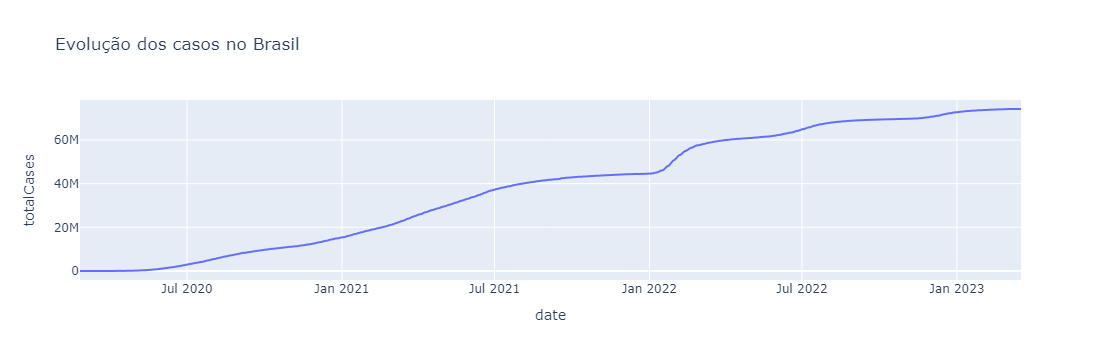

In [119]:
brazil_states_cases_agg = brazil_states_cases.groupby('date').agg({'totalCases': 'sum'}).reset_index()

px.line(
    brazil_states_cases_agg,
    x="date",
    y="totalCases",
    title="Evolução dos casos no Brasil"
)


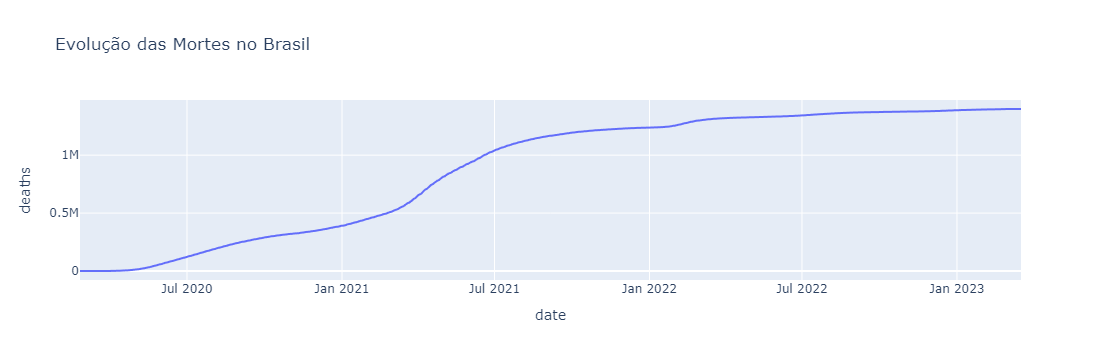

In [120]:
# Agrupar os dados por data
brazil_states_cases_agg = brazil_states_cases.groupby('date').agg({'deaths': 'sum'}).reset_index()

# Gerar o gráfico de linha
px.line(
    brazil_states_cases_agg,
    x="date",
    y="deaths",
    title="Evolução das Mortes no Brasil"
)


### Como está a evolução de casos e mortes no Brasil em comparação com o mundo
O Brasil teve mais casos depois de 2020, mas podemos ver que a relação entre morte e caso no brasil em 2020, foi bem consideravel ou seja, o brasil estava bem despreparado em relação ao mundo sobre isso. Além de que teve muito mais morte tambem depois de 2021 em porcentual ao mundo.?

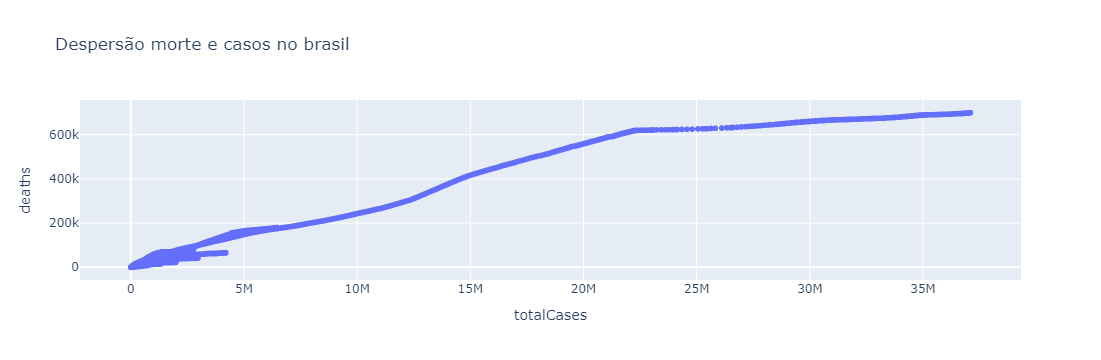

In [121]:
px.scatter(
    brazil_states_cases, 
    x="totalCases",
    y="deaths",
    title=f"Despersão morte e casos no brasil"
)

### Justifique a utilização de cada gráfico
Eu usei histograma para visualizar uma quantidade grande de dados ao longo do tempo que No meu caso, ao lidar com datas e muitos valores numéricos ele ajuda a visualizar a concentração de valores em determinados períodos e pode revelar picos ou padrões sazonais, como aumentos em certos anos ou meses. E a linha eu teria que converter para pegar certos periodos pq ficarai muito confuso as linhas pq a concentração de um dia pra outro ja muda muito nesse tipo de dado, ficaria dificil medir, ai o historiograma agrupa.

Ja a linha, eu usei para dar uma diferenciada e ela é melhor para ver ao longo do tempo a evolução de uma coisa e a do Brasil é menos dado, mas também é muoito variavel eu diria que o hisotriograma é melhor nesse caso também, mas o de linha é ideial para evolução de ao longo de uma data.

E usei um gráfico de dispersão para vermos a relação de dois valores, como o casos e mortes no brasil e podemos ver que no inicio as mortes estavam bem relacionadas a morte, o braisl nao estava preparado.